<a href="https://colab.research.google.com/github/wambui-nduta/nduts/blob/main/Unsupervised_learning_Clustering_Check_point.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Import necessary libraries***


In [1]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

# ***Data preprocessing***

In [2]:
# Load the dataset
df = pd.read_csv('/content/Credit_card_dataset.csv')

df.head()


,CUST_ID,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
0,C10001,0.818182,95.40,201.802084,1000.0,0.000000
1,C10002,0.909091,0.00,4103.032597,7000.0,6442.945483
2,C10003,1.000000,773.17,622.066742,7500.0,0.000000
3,C10004,0.636364,1499.00,0.000000,7500.0,205.788017
4,C10005,1.000000,16.00,678.334763,1200.0,0.000000


In [3]:
# Drop customer ID, its just an identifier and not useful for clustering
df = df.drop('CUST_ID', axis=1)

df.head()

,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
0,0.818182,95.40,201.802084,1000.0,0.000000
1,0.909091,0.00,4103.032597,7000.0,6442.945483
2,1.000000,773.17,622.066742,7500.0,0.000000
3,0.636364,1499.00,0.000000,7500.0,205.788017
4,1.000000,16.00,678.334763,1200.0,0.000000


In [4]:
#chech for nul values
df.isnull().sum()

,0
BALANCE_FREQUENCY,0
PURCHASES,0
PAYMENTS,0
CREDIT_LIMIT,1
CASH_ADVANCE,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BALANCE_FREQUENCY  8950 non-null   float64
 1   PURCHASES          8950 non-null   float64
 2   PAYMENTS           8950 non-null   float64
 3   CREDIT_LIMIT       8949 non-null   float64
 4   CASH_ADVANCE       8950 non-null   float64
dtypes: float64(5)
memory usage: 349.7 KB


In [6]:
df.describe()

,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
count,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000
mean,0.877271,1003.204834,1733.143852,4494.449450,978.871112
std,0.236904,2136.634782,2895.063757,3638.815725,2097.163877
min,0.000000,0.000000,0.000000,50.000000,0.000000
25%,0.888889,39.635000,383.276166,1600.000000,0.000000
50%,1.000000,361.280000,856.901546,3000.000000,0.000000
75%,1.000000,1110.130000,1901.134317,6500.000000,1113.821139
max,1.000000,49039.570000,50721.483360,30000.000000,47137.211760


In [7]:
# fil missing credit limit with mean
df['CREDIT_LIMIT'] = df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean())


In [8]:
df.isnull().sum()

,0
BALANCE_FREQUENCY,0
PURCHASES,0
PAYMENTS,0
CREDIT_LIMIT,0
CASH_ADVANCE,0


In [9]:
#check for duplicates
df.duplicated().sum()

np.int64(0)

# ***Select the features to be used for Clustering***

Kmeans Silhouette Score: 0.5088925779080374
Agglomerative Silhouette Score: 0.42776168481027366


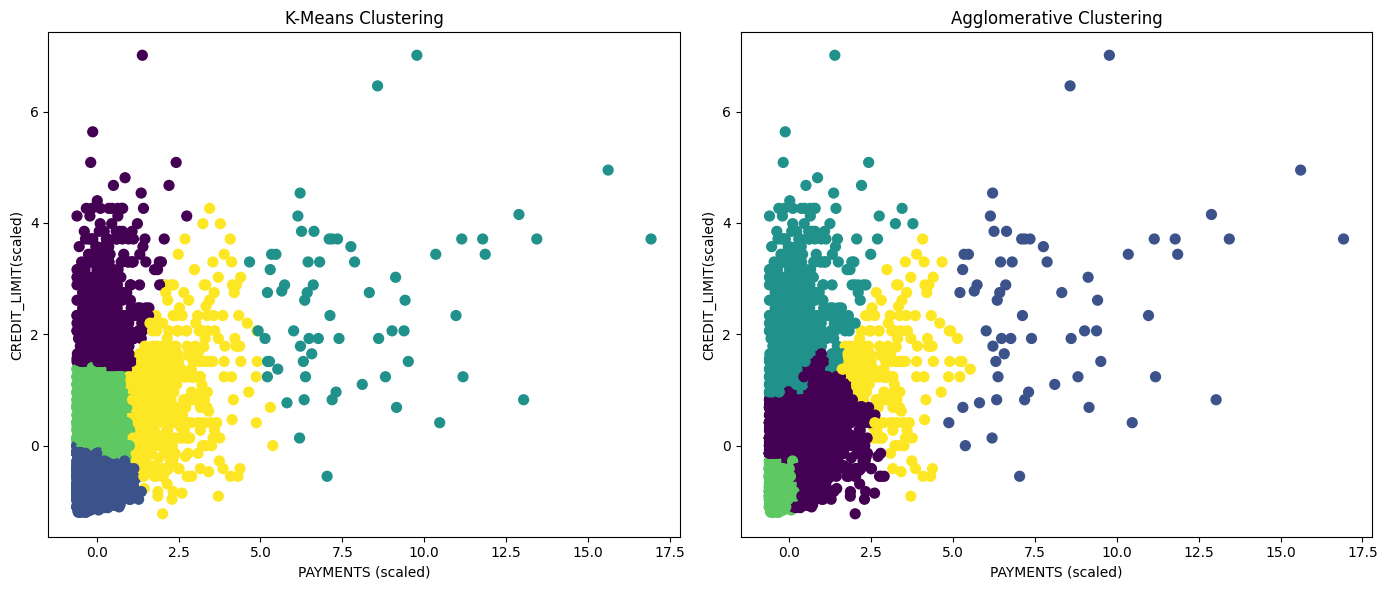

In [11]:
# Select the features to be used for clustering
X = df[['PAYMENTS','CREDIT_LIMIT']]

X = StandardScaler().fit_transform(X)

# Apply Kmeans
Kmeans = KMeans(n_clusters=5, random_state=42)
Kmeans.fit(X)
Kmeans_silhouette = silhouette_score(X, Kmeans.labels_)

# Apply Agglomerative Clustering
Agglomerative = AgglomerativeClustering(n_clusters=5)
Agglomerative.fit(X)
Agglomerative_silhouette = silhouette_score(X, Agglomerative.labels_)

# Print the silhouette scores
print("Kmeans Silhouette Score:", Kmeans_silhouette)
print("Agglomerative Silhouette Score:", Agglomerative_silhouette)

# Plot the results side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# KMeans Plot
scatter1 = ax1.scatter(X[:, 0], X[:, 1], c=Kmeans.labels_, cmap='viridis', s=50)
ax1.set_title("K-Means Clustering")
ax1.set_xlabel("PAYMENTS (scaled)")
ax1.set_ylabel("CREDIT_LIMIT(scaled)")

# Agglomerative Clustering Plot
scatter2 = ax2.scatter(X[:, 0], X[:, 1], c=Agglomerative.labels_, cmap='viridis', s=50)
ax2.set_title("Agglomerative Clustering")
ax2.set_xlabel("PAYMENTS (scaled)")
ax2.set_ylabel("CREDIT_LIMIT(scaled)")

plt.tight_layout()
plt.show()



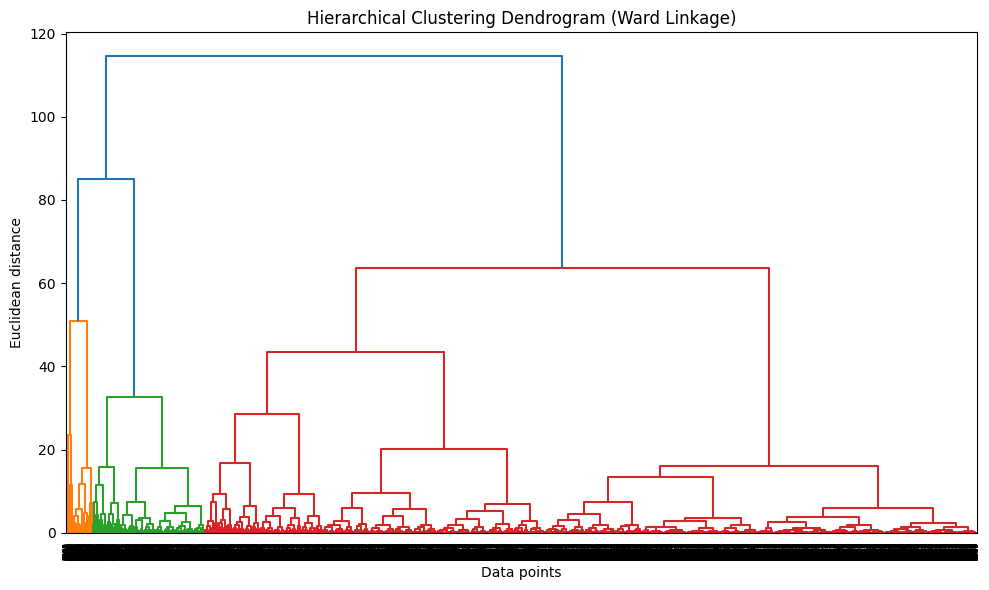

In [12]:
# Plotting a hierarchical clustering dendrogram
linked = linkage(X, method='ward')
plt.figure(figsize=(10, 6))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title("Hierarchical Clustering Dendrogram (Ward Linkage)")
plt.xlabel("Data points")
plt.ylabel("Euclidean distance")
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Inertia')

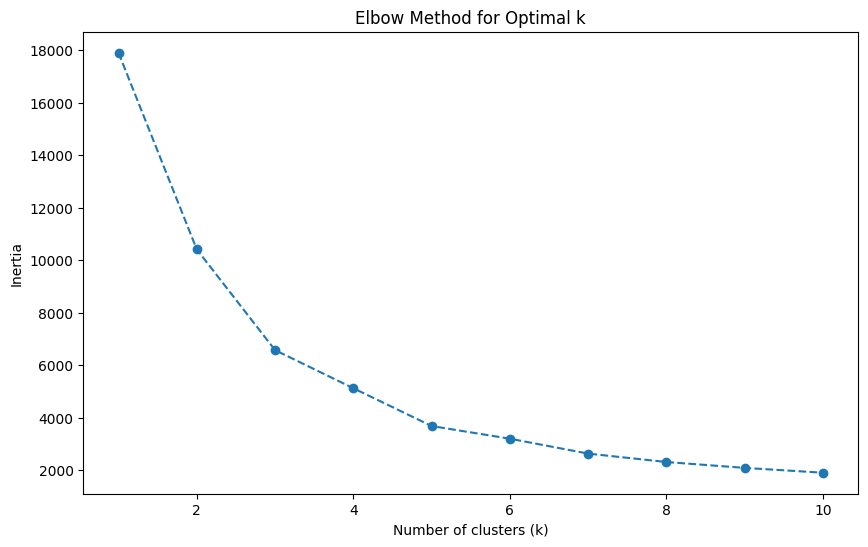

In [13]:
# Plot the optimal k using the elbow method

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
